In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = engine.execute("SELECT date FROM measurement ORDER BY date DESC;").first()
recent_date

('2017-08-23',)

Text(0.5, 1.0, 'Precipitation Over the Last 12 Months')

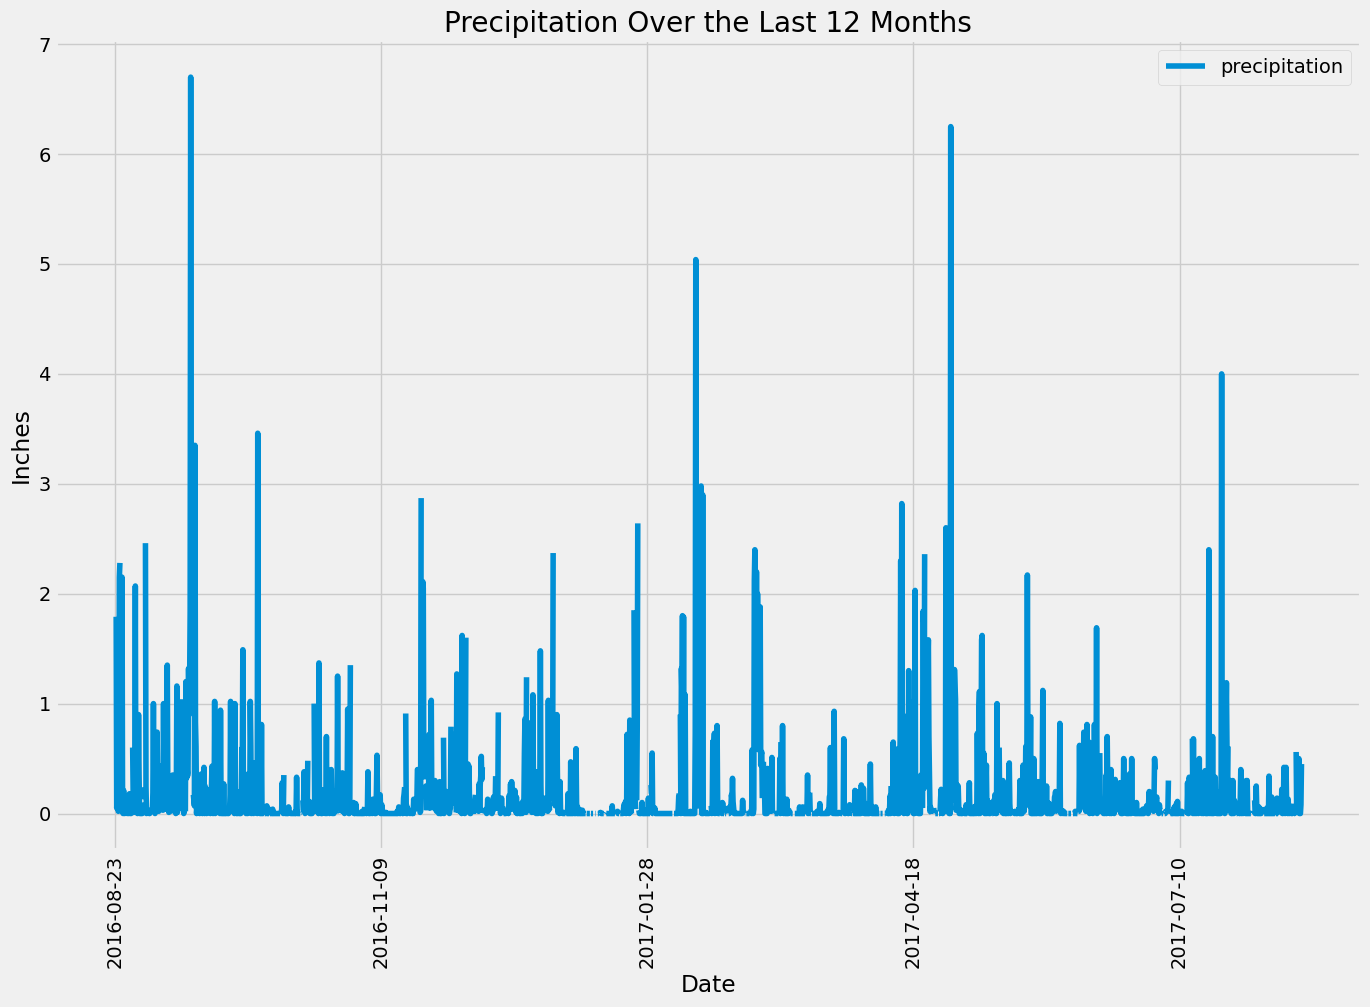

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
year_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
year_date

# Perform a query to retrieve the date and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
conn = engine.connect()
precipitation = pd.read_sql("SELECT date, prcp FROM measurement WHERE date>='2016-08-23'", conn).set_index('date')
precipitation.rename(columns={"prcp":"precipitation"}, inplace=True) #renamed column
# Sort the dataframe by date 
precip_df = precipitation.sort_index() 

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(use_index=True, y='precipitation', rot=90, figsize=(15,10))
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Precipitation Over the Last 12 Months")

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary_stats = pd.DataFrame(precip_df["precipitation"].describe())
summary_stats

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(station.station).count()
total_stations

9

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_activity = engine.execute('SELECT station, COUNT(station) AS "Station Activity" FROM measurement GROUP BY station ORDER BY "Station Activity" DESC;').all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_temp = session.query(func.min(measurement.tobs).filter(measurement.station=="USC00519281"), \
                            func.max(measurement.tobs).filter(measurement.station=="USC00519281"), \
                            func.avg(measurement.tobs).filter(measurement.station=="USC00519281")).all()
station_temp

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 0, 'Temperature')

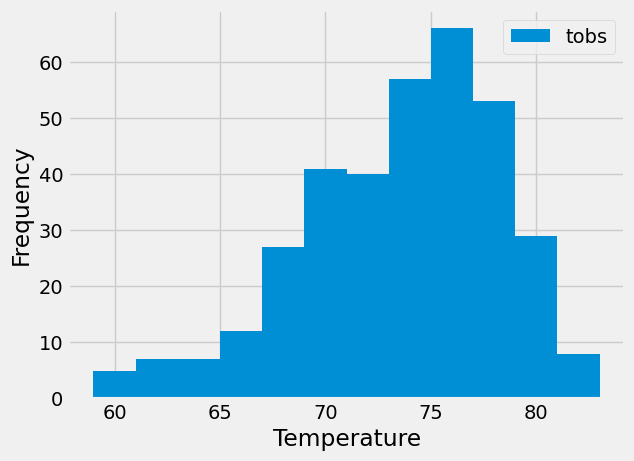

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

conn = engine.connect()
temps_df = pd.read_sql('SELECT tobs FROM measurement WHERE date>="2016-08-23" AND station="USC00519281";', conn)
temps_df["tobs"].plot.hist(bins=12, legend="tobs")
plt.xlabel("Temperature")

# Close session

In [16]:
# Close Session
session.close()